In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv("Titanic Machine Learning from Disaster.csv")
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [105]:
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print('\ndf.info:\n',df.info())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (418, 2)

Data Types:
 PassengerId    int64
Survived       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB

df.info:
 None

Missing Values:
 PassengerId    0
Survived       0
dtype: int64


In [87]:
df['Survived'] = df['Survived'].astype('category')

In [88]:

if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())

if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

if 'Fare' in df.columns:
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# 4. Summary Statistics
print("\nSummary Statistics:\n", df.describe(include='all'))



Summary Statistics:
         PassengerId  Survived
count    418.000000     418.0
unique          NaN       2.0
top             NaN       0.0
freq            NaN     266.0
mean    1100.500000       NaN
std      120.810458       NaN
min      892.000000       NaN
25%      996.250000       NaN
50%     1100.500000       NaN
75%     1204.750000       NaN
max     1309.000000       NaN


In [89]:
if 'Sex' in df.columns and 'Pclass' in df.columns:
    survival_by_gender = df.groupby('Sex')['Survived'].mean() * 100
    survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
    print("\nSurvival Rate by Gender (%):\n", survival_by_gender)
    print("\nSurvival Rate by Class (%):\n", survival_by_class)

In [92]:
overall_survival_rate = df['Survived'].mean() * 418
print(f"\nOverall Survival Rate: {overall_survival_rate:.2f}%")


Overall Survival Rate: 152.00%


In [93]:
sns.set(style="whitegrid")

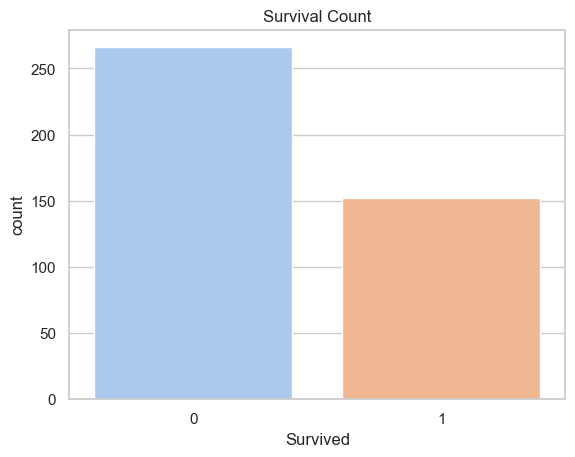

In [104]:
sns.countplot(data=df, x='Survived', hue='Survived', palette='pastel', legend=False)
plt.title("Survival Count")
plt.show()

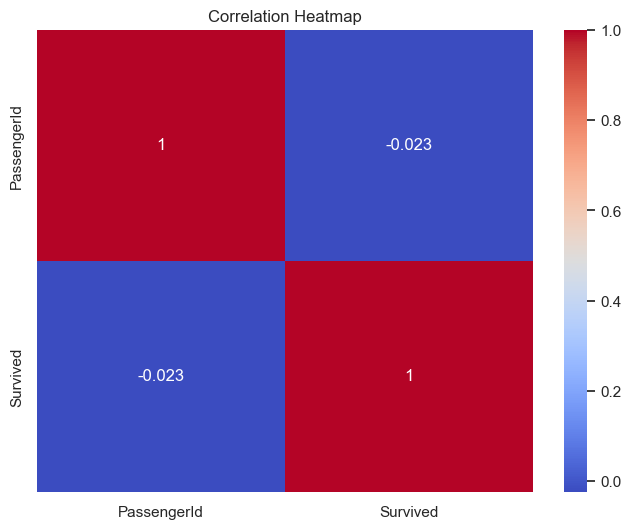

In [102]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()